In [92]:
%load_ext autoreload
%autoreload 2

# Load some modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import sys
import os

sys.path.append(os.path.abspath(os.curdir + '/../modules/analysis/'))

import bloch

%matplotlib inline

params = {'axes.labelsize': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': True,
          'font.size': 14,
          'font.family': 'serif',
          'font.serif': 'serif',
          'figure.figsize': [16,10]}
mpl.rcParams.update(params)

In [141]:
b = bloch.Bloch('carvone', 3, 3)
# Order A, B, C, ...
b.set_egy(np.array([0., 2.46037e-24, 2.67492e-24]))

# Order ab, ac, ad, ... bc, ...
b.set_freq(np.array([3713.17, 4036.97, 323.8]))
b.set_phase(np.array([0., 0., 0.]))
b.set_dip(np.array([2.+0.j, 1.+0.j, 4.+0.j]))
b.set_intens(np.array([1000., 1000., 1000.]))

b.intens['ab'] = np.array([1000., 0., 00.])
b.intens['ac'] = np.array([0., 0., 0.])
b.intens['bc'] = np.array([0., 1000., 000.])

b.set_pulse(np.array([2.60E-8, 2.40E-8, 3.5e-8]))

b.set_pop(np.array([.5, .3, .2]))

b.set_starting_values(0, np.array([[0.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]]))

In [142]:
print 'Energies:', b.egy
print 'Frequencies:', b.freq
print 'Transition dipole moments:', b.dip
print 'Phase:', b.phase
print 'Intensity:', b.intens
print 'Pulse duration:', b.pulse
print 'Population:', b.pop
print 'Starting density matrix:', b.rho0

print 'Parameter:', b.params

Energies: {'A': 0.0, 'C': 2.6749200000000001e-24, 'B': 2.46037e-24}
Frequencies: {'ac': array([  2.53650306e+10,   2.53650306e+10,   2.53650306e+10]), 'ab': array([  2.33305352e+10,   2.33305352e+10,   2.33305352e+10]), 'bc': array([  2.03449540e+09,   2.03449540e+09,   2.03449540e+09])}
Transition dipole moments: {'ac': (3.3349999999999999e-30+0j), 'ab': (6.6699999999999997e-30+0j), 'bc': (1.3339999999999999e-29+0j)}
Phase: {'ac': array([ 0.,  0.,  0.]), 'ab': array([ 0.,  0.,  0.]), 'bc': array([ 0.,  0.,  0.])}
Intensity: {'ac': array([ 0.,  0.,  0.]), 'ab': array([ 1000.,     0.,     0.]), 'bc': array([    0.,  1000.,     0.])}
Pulse duration: [  2.60000000e-08   2.40000000e-08   3.50000000e-08]
Population: {'A': 0.5, 'C': 0.20000000000000001, 'B': 0.29999999999999999}
Starting density matrix: [[ 0.5+0.j  0.0+0.j  0.0+0.j]
 [ 0.0+0.j  0.3+0.j  0.0+0.j]
 [ 0.0+0.j  0.0+0.j  0.2+0.j]]
Parameter: {'Npoints': 1000, 'cut': False, 'parts': 3, 'tr': 3, 'levels': 3}


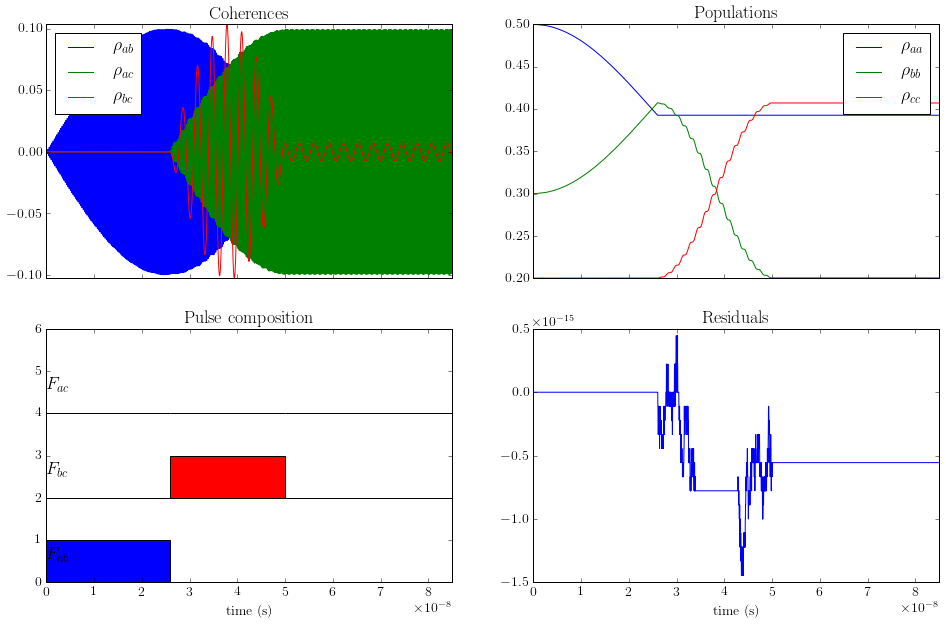

In [23]:
#Solving the Bloch equations
t, rho = b.bloch_solver()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(16,10)

ma = np.max([np.max(rho[0,1,:].real), np.max(rho[0,2,:].real), np.max(rho[1,2,:].real)])
mi = np.min([np.min(rho[0,1,:].real), np.min(rho[0,2,:].real), np.min(rho[1,2,:].real)])

ax1.set_title('Coherences', fontsize=18)
ax1.plot(t, rho[0,1,:].real, label=r'$\rho_{ab}$')
ax1.plot(t, rho[0,2,:].real, label=r'$\rho_{ac}$')
ax1.plot(t, rho[1,2,:].real, label=r'$\rho_{bc}$')

ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(b.t0, np.sum(b.pulse)); ax1.set_ylim((mi, ma));

ax2.set_title('Populations', fontsize=18)
ax2.plot(t, rho[0,0,:].real, label=r'$\rho_{aa}$')
ax2.plot(t, rho[1,1,:].real, label=r'$\rho_{bb}$')
ax2.plot(t, rho[2,2,:].real, label=r'$\rho_{cc}$')
ax2.legend(fontsize=18)
ax2.set_xlim(b.t0, np.sum(b.pulse));

ax3.set_title('Pulse composition', fontsize=18)

for i in np.arange(b.params['parts']):
    m = max([np.max(b.intens['ab']), np.max(b.intens['ac']), np.max(b.intens['bc'])])
    if i == 0:
        x = 0.
    else:
        x += b.pulse[i-1]
    ax3.add_patch(Rectangle((x, 0.), b.pulse[i], b.intens['ab'][i]/m, facecolor="blue"))
    ax3.add_patch(Rectangle((x, 4.), b.pulse[i], b.intens['ac'][i]/m, facecolor="green"))
    ax3.add_patch(Rectangle((x, 2.), b.pulse[i], b.intens['bc'][i]/m, facecolor="red"))


ax3.text(0, .5, r'$F_{ab}$', fontsize=18); ax3.text(0, 2.5, r'$F_{bc}$', fontsize=18); ax3.text(0, 4.5, r'$F_{ac}$', fontsize=18)
ax3.set_xlim(b.t0, np.sum(b.pulse)); ax3.set_ylim(0., 6.); ax3.set_xlabel('time (s)')

ax4.set_title('Residuals', fontsize=18)
ax4.plot(t, (rho[2,2,:].real + rho[1,1,:].real + rho[0,0,:].real)-1.)
ax4.set_xlim(b.t0, np.sum(b.pulse)); ax4.set_xlabel('time (s)');

In [151]:
b = bloch.Bloch('carvone', 3, 3)
# Order A, B, C, ...
b.set_egy(np.array([0., 2.46037e-24, 2.67492e-24]))
b.set_dip(np.array([2.+0.j, 1.+0.j, 4.+0.j]))
b.set_pop(np.array([.5, .3, .2]))
b.set_starting_values(0, np.array([[0.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]]))


b.rect_pulse(0, 2.60E-8, 3713.17, 'ab', 1000.)
b.rect_pulse(2.60E-8, 2.40E-8, 323.8, 'bc', 1000.)
b.rect_pulse(5.E-8, 3.5e-8, 323.8, 'bc', 0.)

b.generate_pulse_scheme()

In [152]:
print 'Energies:', b.egy
print 'Frequencies:', b.freq
print 'Transition dipole moments:', b.dip
print 'Phase:', b.phase
print 'Intensity:', b.intens
print 'Pulse duration:', b.pulse
print 'Population:', b.pop
print 'Starting density matrix:', b.rho0

print 'Parameter:', b.params

Energies: {'A': 0.0, 'C': 2.6749200000000001e-24, 'B': 2.46037e-24}
Frequencies: {'ac': array([ 0.,  0.,  0.]), 'ab': array([  2.33305352e+10,   0.00000000e+00,   0.00000000e+00]), 'bc': array([  0.00000000e+00,   2.03449540e+09,   2.03449540e+09])}
Transition dipole moments: {'ac': (3.3349999999999999e-30+0j), 'ab': (6.6699999999999997e-30+0j), 'bc': (1.3339999999999999e-29+0j)}
Phase: {'ac': array([ 0.,  0.,  0.]), 'ab': array([ 0.,  0.,  0.]), 'bc': array([ 0.,  0.,  0.])}
Intensity: {'ac': array([ 0.,  0.,  0.]), 'ab': array([ 1000.,     0.,     0.]), 'bc': array([    0.,  1000.,     0.])}
Pulse duration: [  2.60000000e-08   2.40000000e-08   3.50000000e-08]
Population: {'A': 0.5, 'C': 0.20000000000000001, 'B': 0.29999999999999999}
Starting density matrix: [[ 0.5+0.j  0.0+0.j  0.0+0.j]
 [ 0.0+0.j  0.3+0.j  0.0+0.j]
 [ 0.0+0.j  0.0+0.j  0.2+0.j]]
Parameter: {'Npoints': 1000, 'cut': False, 'parts': 3, 'tr': 3, 'levels': 3}


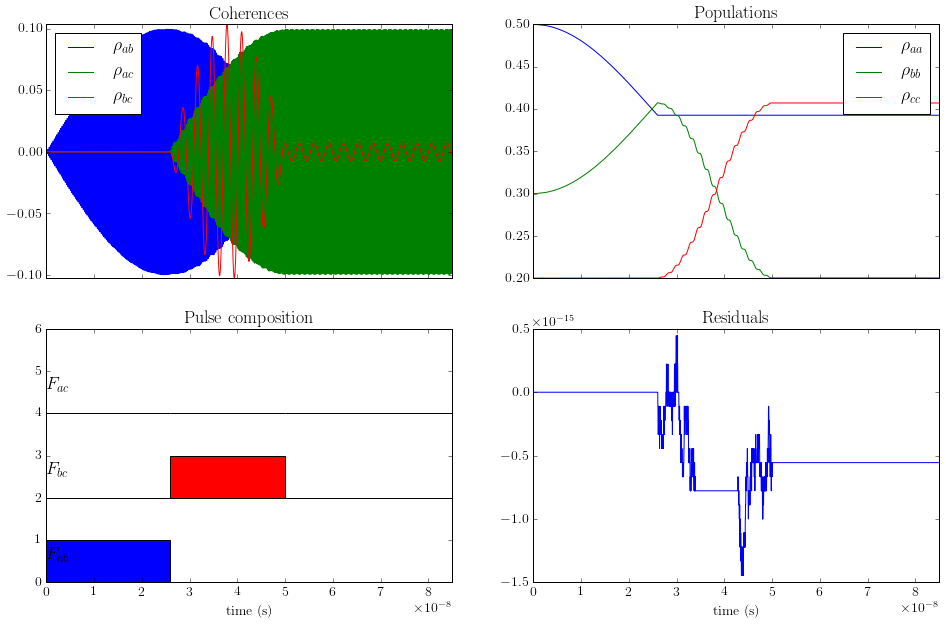

In [153]:
#Solving the Bloch equations
t, rho = b.bloch_solver()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(16,10)

ma = np.max([np.max(rho[0,1,:].real), np.max(rho[0,2,:].real), np.max(rho[1,2,:].real)])
mi = np.min([np.min(rho[0,1,:].real), np.min(rho[0,2,:].real), np.min(rho[1,2,:].real)])

ax1.set_title('Coherences', fontsize=18)
ax1.plot(t, rho[0,1,:].real, label=r'$\rho_{ab}$')
ax1.plot(t, rho[0,2,:].real, label=r'$\rho_{ac}$')
ax1.plot(t, rho[1,2,:].real, label=r'$\rho_{bc}$')

ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(b.t0, np.sum(b.pulse)); ax1.set_ylim((mi, ma));

ax2.set_title('Populations', fontsize=18)
ax2.plot(t, rho[0,0,:].real, label=r'$\rho_{aa}$')
ax2.plot(t, rho[1,1,:].real, label=r'$\rho_{bb}$')
ax2.plot(t, rho[2,2,:].real, label=r'$\rho_{cc}$')
ax2.legend(fontsize=18)
ax2.set_xlim(b.t0, np.sum(b.pulse));

ax3.set_title('Pulse composition', fontsize=18)

for i in np.arange(b.params['parts']):
    m = max([np.max(b.intens['ab']), np.max(b.intens['ac']), np.max(b.intens['bc'])])
    if i == 0:
        x = 0.
    else:
        x += b.pulse[i-1]
    ax3.add_patch(Rectangle((x, 0.), b.pulse[i], b.intens['ab'][i]/m, facecolor="blue"))
    ax3.add_patch(Rectangle((x, 4.), b.pulse[i], b.intens['ac'][i]/m, facecolor="green"))
    ax3.add_patch(Rectangle((x, 2.), b.pulse[i], b.intens['bc'][i]/m, facecolor="red"))


ax3.text(0, .5, r'$F_{ab}$', fontsize=18); ax3.text(0, 2.5, r'$F_{bc}$', fontsize=18); ax3.text(0, 4.5, r'$F_{ac}$', fontsize=18)
ax3.set_xlim(b.t0, np.sum(b.pulse)); ax3.set_ylim(0., 6.); ax3.set_xlabel('time (s)')

ax4.set_title('Residuals', fontsize=18)
ax4.plot(t, (rho[2,2,:].real + rho[1,1,:].real + rho[0,0,:].real)-1.)
ax4.set_xlim(b.t0, np.sum(b.pulse)); ax4.set_xlabel('time (s)');

In [175]:
b = bloch.Bloch('carvone', 3, 3)
# Order A, B, C, ...
b.set_egy(np.array([0., 2.46037e-24, 2.67492e-24]))
b.set_dip(np.array([2.+0.j, 1.+0.j, 4.+0.j]))
b.set_pop(np.array([.5, .3, .2]))
b.set_starting_values(0, np.array([[0.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]]))


b.rect_pulse(0, 2.60E-8, 3713.17, 'ab', 1000.)
b.rect_pulse(2.4E-8, 2.60E-8, 323.8, 'bc', 1000.)
b.rect_pulse(5.E-8, 3.5e-8, 323.8, 'bc', 0.)
b.rect_pulse(8.500000E-8, 3.5e-8, 323.8, 'bc', 0.)

b.generate_pulse_scheme()

In [176]:
print 'Energies:', b.egy
print 'Frequencies:', b.freq
print 'Transition dipole moments:', b.dip
print 'Phase:', b.phase
print 'Intensity:', b.intens
print 'Pulse duration:', b.pulse
print 'Population:', b.pop
print 'Starting density matrix:', b.rho0

print 'Parameter:', b.params

print 'Pulse scheme:', b.pulse_scheme

Energies: {'A': 0.0, 'C': 2.6749200000000001e-24, 'B': 2.46037e-24}
Frequencies: {'ac': array([ 0.,  0.,  0.,  0.,  0.]), 'ab': array([  2.33305352e+10,   2.33305352e+10,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00]), 'bc': array([  0.00000000e+00,   2.03449540e+09,   2.03449540e+09,
         2.03449540e+09,   0.00000000e+00])}
Transition dipole moments: {'ac': (3.3349999999999999e-30+0j), 'ab': (6.6699999999999997e-30+0j), 'bc': (1.3339999999999999e-29+0j)}
Phase: {'ac': array([ 0.,  0.,  0.,  0.,  0.]), 'ab': array([ 0.,  0.,  0.,  0.,  0.]), 'bc': array([ 0.,  0.,  0.,  0.,  0.])}
Intensity: {'ac': array([ 0.,  0.,  0.,  0.,  0.]), 'ab': array([ 1000.,  1000.,     0.,     0.,     0.]), 'bc': array([    0.,  1000.,  1000.,     0.,     0.])}
Pulse duration: [  2.40000000e-08   2.00000000e-09   2.40000000e-08   3.50000000e-08
   3.50000000e-08]
Population: {'A': 0.5, 'C': 0.20000000000000001, 'B': 0.29999999999999999}
Starting density matrix: [[ 0.5+0.j  0.0+0.j  0.0+0.

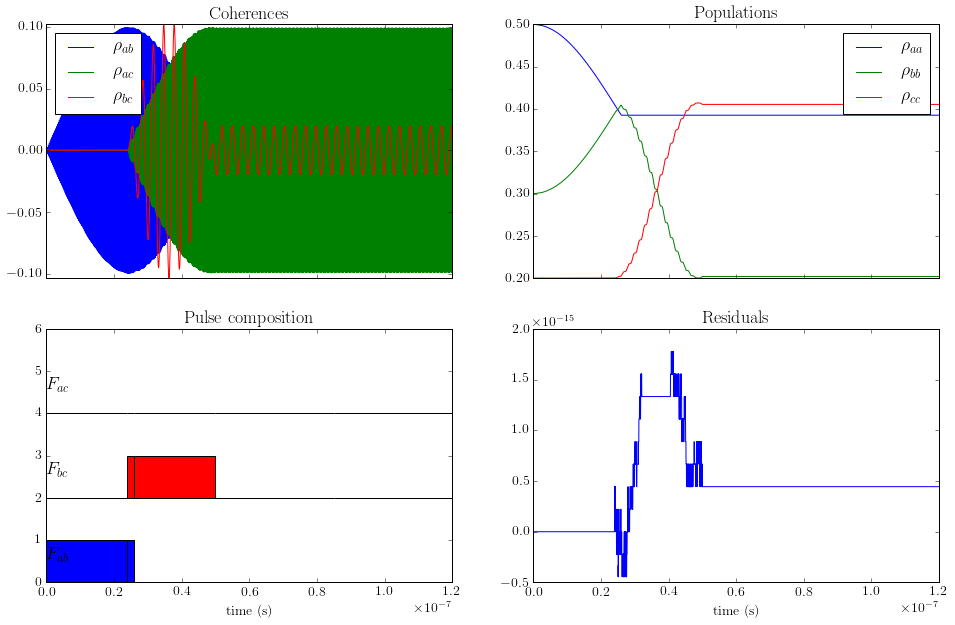

In [177]:
#Solving the Bloch equations
t, rho = b.bloch_solver()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(16,10)

ma = np.max([np.max(rho[0,1,:].real), np.max(rho[0,2,:].real), np.max(rho[1,2,:].real)])
mi = np.min([np.min(rho[0,1,:].real), np.min(rho[0,2,:].real), np.min(rho[1,2,:].real)])

ax1.set_title('Coherences', fontsize=18)
ax1.plot(t, rho[0,1,:].real, label=r'$\rho_{ab}$')
ax1.plot(t, rho[0,2,:].real, label=r'$\rho_{ac}$')
ax1.plot(t, rho[1,2,:].real, label=r'$\rho_{bc}$')

ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(b.t0, np.sum(b.pulse)); ax1.set_ylim((mi, ma));

ax2.set_title('Populations', fontsize=18)
ax2.plot(t, rho[0,0,:].real, label=r'$\rho_{aa}$')
ax2.plot(t, rho[1,1,:].real, label=r'$\rho_{bb}$')
ax2.plot(t, rho[2,2,:].real, label=r'$\rho_{cc}$')
ax2.legend(fontsize=18)
ax2.set_xlim(b.t0, np.sum(b.pulse));

ax3.set_title('Pulse composition', fontsize=18)

for i in np.arange(b.params['parts']):
    m = max([np.max(b.intens['ab']), np.max(b.intens['ac']), np.max(b.intens['bc'])])
    if i == 0:
        x = 0.
    else:
        x += b.pulse[i-1]
    ax3.add_patch(Rectangle((x, 0.), b.pulse[i], b.intens['ab'][i]/m, facecolor="blue"))
    ax3.add_patch(Rectangle((x, 4.), b.pulse[i], b.intens['ac'][i]/m, facecolor="green"))
    ax3.add_patch(Rectangle((x, 2.), b.pulse[i], b.intens['bc'][i]/m, facecolor="red"))


ax3.text(0, .5, r'$F_{ab}$', fontsize=18); ax3.text(0, 2.5, r'$F_{bc}$', fontsize=18); ax3.text(0, 4.5, r'$F_{ac}$', fontsize=18)
ax3.set_xlim(b.t0, np.sum(b.pulse)); ax3.set_ylim(0., 6.); ax3.set_xlabel('time (s)')

ax4.set_title('Residuals', fontsize=18)
ax4.plot(t, (rho[2,2,:].real + rho[1,1,:].real + rho[0,0,:].real)-1.)
ax4.set_xlim(b.t0, np.sum(b.pulse)); ax4.set_xlabel('time (s)');

In [210]:
b = bloch.Bloch('carvone', 3, 3)
# Order A, B, C, ...
b.set_egy(np.array([0., 2.46037e-24, 2.67492e-24]))
b.set_dip(np.array([2.+0.j, 1.+0.j, 4.+0.j]))
b.set_pop(np.array([.5, .3, .2]))
b.set_starting_values(0, np.array([[0.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]]))


b.chirped_pulse(0, 2.60E-8, 3710.17, 3716.17, 'ab', 1000.)
b.rect_pulse(2.4E-8, 2.60E-8, 323.8, 'bc', 1000.)
b.rect_pulse(5.E-8, 3.5e-8, 323.8, 'bc', 0.)
b.rect_pulse(8.500000E-8, 3.5e-8, 323.8, 'bc', 1000.)

b.generate_pulse_scheme()

In [211]:
print 'Pulse scheme:', b.pulse_scheme[:100]

Pulse scheme: [[0.0, 'ab', 3710.1700000000001, 1000.0, 0], [9.9999999999999994e-12, 'ab', 3710.1723068050751, 1000.0, 0], [1.9999999999999999e-11, 'ab', 3710.1746136101501, 1000.0, 0], [3e-11, 'ab', 3710.1769204152251, 1000.0, 0], [3.9999999999999998e-11, 'ab', 3710.1792272203002, 1000.0, 0], [4.9999999999999995e-11, 'ab', 3710.1815340253747, 1000.0, 0], [6e-11, 'ab', 3710.1838408304498, 1000.0, 0], [6.9999999999999991e-11, 'ab', 3710.1861476355248, 1000.0, 0], [7.9999999999999995e-11, 'ab', 3710.1884544405998, 1000.0, 0], [8.9999999999999999e-11, 'ab', 3710.1907612456748, 1000.0, 0], [9.9999999999999991e-11, 'ab', 3710.1930680507498, 1000.0, 0], [1.0999999999999999e-10, 'ab', 3710.1953748558249, 1000.0, 0], [1.2e-10, 'ab', 3710.1976816608999, 1000.0, 0], [1.2999999999999999e-10, 'ab', 3710.1999884659749, 1000.0, 0], [1.3999999999999998e-10, 'ab', 3710.2022952710495, 1000.0, 0], [1.5e-10, 'ab', 3710.2046020761245, 1000.0, 0], [1.5999999999999999e-10, 'ab', 3710.2069088811995, 1000.0, 0

In [204]:
print 'Energies:', b.egy
print 'Frequencies:', b.freq
print 'Transition dipole moments:', b.dip
print 'Phase:', b.phase
print 'Intensity:', b.intens
print 'Pulse duration:', b.pulse
print 'Population:', b.pop
print 'Starting density matrix:', b.rho0

print 'Parameter:', b.params

print 'Pulse scheme:', b.pulse_scheme[:100]

Energies: {'A': 0.0, 'C': 2.6749200000000001e-24, 'B': 2.46037e-24}
Frequencies: {'ac': array([ 0.,  0.,  0.,  0.]), 'ab': array([  2.33116856e+10,   2.33116856e+10,   2.33116856e+10,
         2.33116856e+10]), 'bc': array([  0.00000000e+00,   2.03449540e+09,   0.00000000e+00,
         2.03449540e+09])}
Transition dipole moments: {'ac': (3.3349999999999999e-30+0j), 'ab': (6.6699999999999997e-30+0j), 'bc': (1.3339999999999999e-29+0j)}
Phase: {'ac': array([ 0.,  0.,  0.,  0.]), 'ab': array([ 0.,  0.,  0.,  0.]), 'bc': array([ 0.,  0.,  0.,  0.])}
Intensity: {'ac': array([ 0.,  0.,  0.,  0.]), 'ab': array([ 1000.,  1000.,  1000.,  1000.]), 'bc': array([    0.,  1000.,     0.,  1000.])}
Pulse duration: [  2.40000000e-08   2.60000000e-08   3.50000000e-08   3.50000000e-08]
Population: {'A': 0.5, 'C': 0.20000000000000001, 'B': 0.29999999999999999}
Starting density matrix: [[ 0.5+0.j  0.0+0.j  0.0+0.j]
 [ 0.0+0.j  0.3+0.j  0.0+0.j]
 [ 0.0+0.j  0.0+0.j  0.2+0.j]]
Parameter: {'Npoints': 1000, 'c

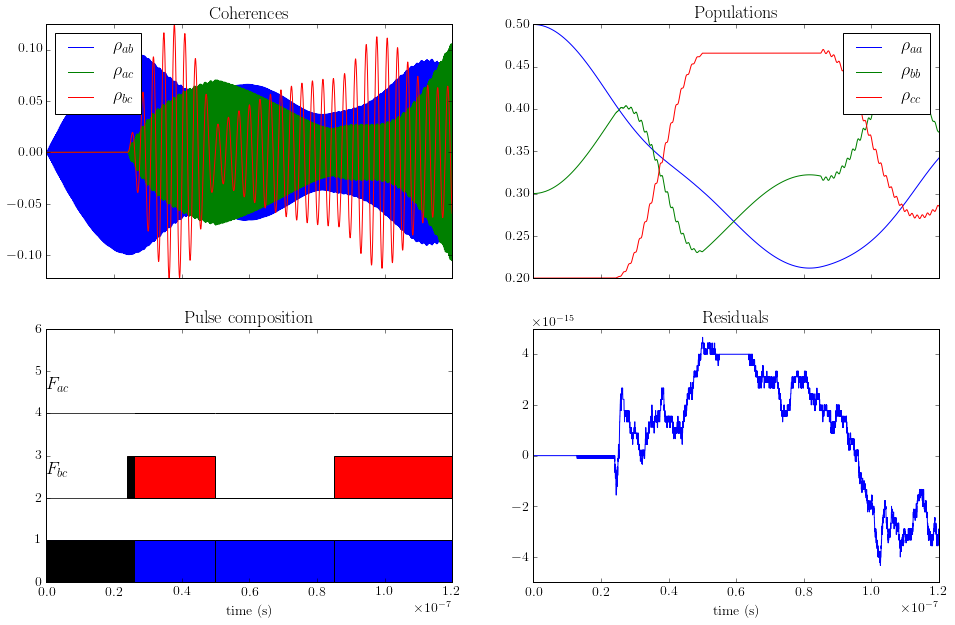

In [212]:
#Solving the Bloch equations
t, rho = b.bloch_solver()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(16,10)

ma = np.max([np.max(rho[0,1,:].real), np.max(rho[0,2,:].real), np.max(rho[1,2,:].real)])
mi = np.min([np.min(rho[0,1,:].real), np.min(rho[0,2,:].real), np.min(rho[1,2,:].real)])

ax1.set_title('Coherences', fontsize=18)
ax1.plot(t, rho[0,1,:].real, label=r'$\rho_{ab}$')
ax1.plot(t, rho[0,2,:].real, label=r'$\rho_{ac}$')
ax1.plot(t, rho[1,2,:].real, label=r'$\rho_{bc}$')

ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(b.t0, np.sum(b.pulse)); ax1.set_ylim((mi, ma));

ax2.set_title('Populations', fontsize=18)
ax2.plot(t, rho[0,0,:].real, label=r'$\rho_{aa}$')
ax2.plot(t, rho[1,1,:].real, label=r'$\rho_{bb}$')
ax2.plot(t, rho[2,2,:].real, label=r'$\rho_{cc}$')
ax2.legend(fontsize=18)
ax2.set_xlim(b.t0, np.sum(b.pulse));

ax3.set_title('Pulse composition', fontsize=18)

for i in np.arange(b.params['parts']):
    m = max([np.max(b.intens['ab']), np.max(b.intens['ac']), np.max(b.intens['bc'])])
    if i == 0:
        x = 0.
    else:
        x += b.pulse[i-1]
    ax3.add_patch(Rectangle((x, 0.), b.pulse[i], b.intens['ab'][i]/m, facecolor="blue"))
    ax3.add_patch(Rectangle((x, 4.), b.pulse[i], b.intens['ac'][i]/m, facecolor="green"))
    ax3.add_patch(Rectangle((x, 2.), b.pulse[i], b.intens['bc'][i]/m, facecolor="red"))


ax3.text(0, .5, r'$F_{ab}$', fontsize=18); ax3.text(0, 2.5, r'$F_{bc}$', fontsize=18); ax3.text(0, 4.5, r'$F_{ac}$', fontsize=18)
ax3.set_xlim(b.t0, np.sum(b.pulse)); ax3.set_ylim(0., 6.); ax3.set_xlabel('time (s)')

ax4.set_title('Residuals', fontsize=18)
ax4.plot(t, (rho[2,2,:].real + rho[1,1,:].real + rho[0,0,:].real)-1.)
ax4.set_xlim(b.t0, np.sum(b.pulse)); ax4.set_xlabel('time (s)');

In [ ]:
b = bloch.Bloch('carvone', 6, 6)
# Order A, B, C, ...
b.set_egy(np.array([0., 1.636056E-24, 2.634604E-24, 5.014106E-24, 5.318766E-24, 8.184773E-24]))

# Order ab, ac, ad, ... bc, ...
b.set_freq(np.array([3713.17, 4036.97, 323.8]))
b.set_phase(np.array([0., 0., 0.]))
b.set_dip(np.array([2.+0.j, 1.+0.j, 4.+0.j]))
b.set_intens(np.array([1000., 1000., 1000.]))

b.intens['ab'] = np.array([1000., 0., 00.])
b.intens['ac'] = np.array([0., 0., 0.])
b.intens['bc'] = np.array([0., 1000., 000.])

b.set_pulse(np.array([2.60E-8, 2.40E-8, 3.5e-8]))

b.set_pop(np.array([.5, .3, .2]))

b.set_starting_values(0, np.array([[0.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j], 
                                   [0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]]))

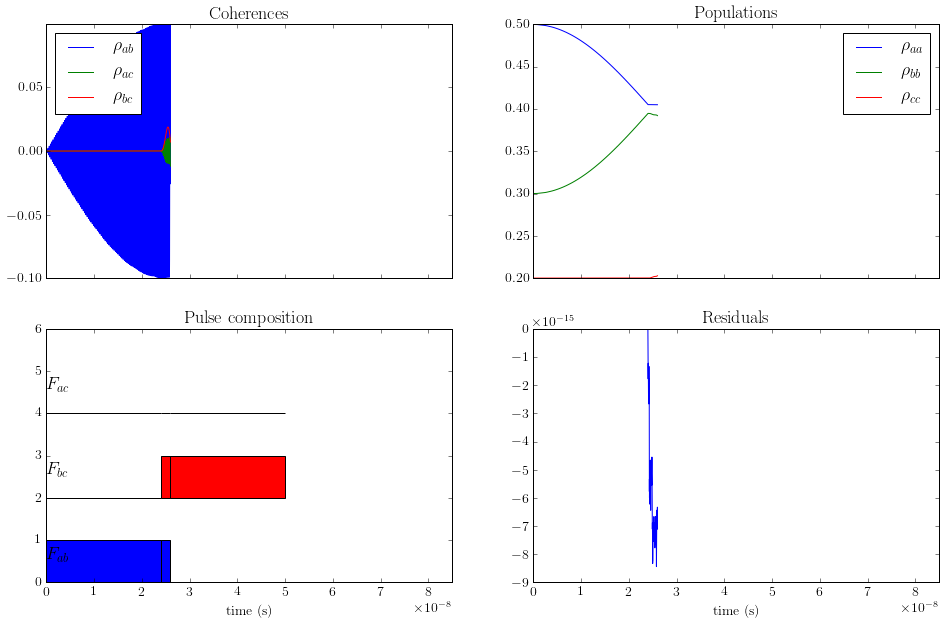

In [157]:
#Solving the Bloch equations
t, rho = b.bloch_solver()

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(16,10)

ma = np.max([np.max(rho[0,1,:].real), np.max(rho[0,2,:].real), np.max(rho[1,2,:].real)])
mi = np.min([np.min(rho[0,1,:].real), np.min(rho[0,2,:].real), np.min(rho[1,2,:].real)])

ax1.set_title('Coherences', fontsize=18)
ax1.plot(t, rho[0,1,:].real, label=r'$\rho_{ab}$')
ax1.plot(t, rho[0,2,:].real, label=r'$\rho_{ac}$')
ax1.plot(t, rho[1,2,:].real, label=r'$\rho_{bc}$')

ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(b.t0, np.sum(b.pulse)); ax1.set_ylim((mi, ma));

ax2.set_title('Populations', fontsize=18)
ax2.plot(t, rho[0,0,:].real, label=r'$\rho_{aa}$')
ax2.plot(t, rho[1,1,:].real, label=r'$\rho_{bb}$')
ax2.plot(t, rho[2,2,:].real, label=r'$\rho_{cc}$')
ax2.legend(fontsize=18)
ax2.set_xlim(b.t0, np.sum(b.pulse));

ax3.set_title('Pulse composition', fontsize=18)

for i in np.arange(b.params['parts']):
    m = max([np.max(b.intens['ab']), np.max(b.intens['ac']), np.max(b.intens['bc'])])
    if i == 0:
        x = 0.
    else:
        x += b.pulse[i-1]
    ax3.add_patch(Rectangle((x, 0.), b.pulse[i], b.intens['ab'][i]/m, facecolor="blue"))
    ax3.add_patch(Rectangle((x, 4.), b.pulse[i], b.intens['ac'][i]/m, facecolor="green"))
    ax3.add_patch(Rectangle((x, 2.), b.pulse[i], b.intens['bc'][i]/m, facecolor="red"))


ax3.text(0, .5, r'$F_{ab}$', fontsize=18); ax3.text(0, 2.5, r'$F_{bc}$', fontsize=18); ax3.text(0, 4.5, r'$F_{ac}$', fontsize=18)
ax3.set_xlim(b.t0, np.sum(b.pulse)); ax3.set_ylim(0., 6.); ax3.set_xlabel('time (s)')

ax4.set_title('Residuals', fontsize=18)
ax4.plot(t, (rho[2,2,:].real + rho[1,1,:].real + rho[0,0,:].real)-1.)
ax4.set_xlim(b.t0, np.sum(b.pulse)); ax4.set_xlabel('time (s)');

In [7]:
import scipy.constants as con
print (2469.12+ 5098.12+4785.14) * 1E6 * con.h

8.18477350407e-24


In [8]:
con.h * 1E6

6.62607004e-28

In [223]:
import numpy as np

t = np.arange(0, 2E-6, 1E-10)
chirp = np.sin(2. * np.pi *( t * 20.E6 + (30E6-20E6)/4E-6*t**2))

chirp1 = np.sin(2. * np.pi *( t * 20.E6))

chirp2 = np.sin(2. * np.pi *( t * 30.E6))


In [19]:
import matplotlib.pyplot as plt

In [225]:
plt.plot(t,chirp)
plt.plot(t,chirp1)
plt.plot(t,chirp2)

plt.show()

In [215]:
%matplotlib

Using matplotlib backend: MacOSX


In [78]:
T = 1./(25.3E6)
np.mod(1E-6, T)


1.1857707509881404e-08

In [79]:
phase = np.mod(1E-6, T)/T * 2*np.pi

In [90]:
t = np.arange(0, 2E-6, 1E-10)
mono = np.sin(2. * np.pi *( t * 25.3E6 )- .3 * 2*np.pi)

In [91]:
plt.plot(t,mono)
plt.grid()

In [82]:
1E-6/T

25.3

In [89]:
1.1857707509881404e-08/T

0.29999999999999954

In [187]:
a = [1,2,4,5,6,9]

In [189]:
a.pop(4)

6

In [190]:
a

[1, 2, 4, 5, 9]